In [1]:
import pandas as pd
!pip install plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install tabulate
#from tabulate import tabulate
#pip install wordcloud
#from os import path
#from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

### Airline CSV

In [2]:
airlines = pd.read_csv('../Data/airlines.csv')
airlines.tail()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
6159,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
6160,21270,Air Carnival,NaN,2S,\N,NaN,India,Y
6161,21317,Svyaz Rossiya,Russian Commuter,7R,SJM,RussianConnecty,Russia,Y


In [3]:
airlines.columns

Index(['Airline ID', 'Name', 'Alias', 'IATA', 'ICAO', 'Callsign', 'Country',
       'Active'],
      dtype='object')

In [4]:
#how many rows?
airlines.shape

(6162, 8)

In [5]:
airlines.isnull().sum()

Airline ID       0
Name             0
Alias          506
IATA          4627
ICAO            87
Callsign       808
Country         15
Active           0
dtype: int64

In [6]:
#drop Alias column
airlines.drop('Alias', axis=1, inplace=True)
airlines.drop('Callsign', axis=1, inplace=True)
#airlines.head()

In [7]:
#subset for active airlines
airlines = airlines[airlines['Active']=='Y']
airlines.tail()

,Airline ID,Name,IATA,ICAO,Country,Active
6154,21179,Thai Vietjet Air,NaN,TVJ,Thailand,Y
6157,21248,GX Airlines,NaN,CBG,China,Y
6159,21268,Jetgo Australia,JG,\N,Australia,Y
6160,21270,Air Carnival,2S,\N,India,Y
6161,21317,Svyaz Rossiya,7R,SJM,Russia,Y


In [8]:
airlines.rename(columns = {'Airline ID':'AirLine_ID_al','Name':'Name_al', 'IATA':'IATA_al', 'ICAO':'ICAO_al','Country':'Country_al', 'Active':'Active_al'}, inplace=True)
airlines.head(2)
#unknown and private, etc., will drop out when joined with delays

,AirLine_ID_al,Name_al,IATA_al,ICAO_al,Country_al,Active_al
0,-1,Unknown,-,NaN,\N,Y
1,1,Private flight,-,NaN,NaN,Y


In [9]:
airlines.shape

(1255, 6)

In [10]:
airlines.isnull().sum()

AirLine_ID_al      0
Name_al            0
IATA_al          240
ICAO_al           29
Country_al         2
Active_al          0
dtype: int64

In [11]:
airlines.Name_al.unique()

array(['Unknown', 'Private flight', '1Time Airline', ...,
       'Jetgo Australia', 'Air Carnival', 'Svyaz Rossiya'], dtype=object)

In [12]:
#print(tabulate(airlines, headers='keys', tablefmt='pretty'))

In [13]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [14]:
#airlines['newname'] = airlines['Name']
#airlines.head(10)

In [15]:
#airlines['newname'] = airlines['newname'].str.replace('-',' ')
#airlines.head()

In [16]:
#airlines['newname'] = airlines['newname'].str.extract(r'(\w+\s+\w+)')
#airlines.head()

In [17]:
airlines.Name_al.value_counts()

Thomas Cook Airlines    2
Comair                  2
Air Salone              2
Tyrolean Airways        2
Jet Airways             2
                       ..
KD Avia                 1
Juneyao Airlines        1
Jetstar Airways         1
Jetflite                1
Svyaz Rossiya           1
Name: Name_al, Length: 1249, dtype: int64

### FAA Regions

In [18]:
FAA_Regions = pd.read_csv('../Data/Federal_Aviation_Administration_FAA_Regions.csv')
FAA_Regions.head(11)

,FID,REGION,CNT_REGION,Shape_Leng,Shape_Area
0,1,New England Region,6,152.233742,19.099946
1,2,Central Region,4,51.318016,78.091215
2,3,Southern Region,8,471.324583,94.856190
3,4,Western Pacific Region,4,94.202014,101.933953
4,5,Southwest Region,5,428.811114,138.650729
5,6,Great Lakes Region,8,189.109110,139.986989
6,7,Eastern Region,8,308.913778,48.682795
7,8,Northwest Mountain Region,7,151.363696,197.475811
8,9,Alaska Region,1,1033.192985,278.612678


In [19]:
FAA_Regions.columns

Index(['FID', 'REGION', 'CNT_REGION', 'Shape_Leng', 'Shape_Area'], dtype='object')

### Airports

In [20]:
airports = pd.read_csv('../Data/Airports.csv')
airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [21]:
bna = airports[airports['IATA'] == 'BNA']
bna.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
3490,3690,Nashville International Airport,Nashville,United States,BNA,KBNA,36.1245,-86.6782,599,-6,A,America/Chicago,airport,OurAirports


In [22]:
airports.shape

(7698, 14)

In [23]:
airports.columns

Index(['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone',
       'Type', 'Source'],
      dtype='object')

In [24]:
airports.drop(['DST', 'Tz database time zone', 'Type', 'Source'], axis=1, inplace=True)
airports.head(2)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10


In [25]:
airports.rename(columns = {'Name':'Name_ap', 'Country':'Country_ap','IATA':'IATA_ap', 'ICAO':'ICAO_ap', 'Latitude':'Lat_ap', 'Longitude':'Long_ap', 'Altitude':'Alt_ap', 'Timezone':'TZone_ap'}, inplace=True)
airports.head(2)

,Airport ID,Name_ap,City,Country_ap,IATA_ap,ICAO_ap,Lat_ap,Long_ap,Alt_ap,TZone_ap
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10


In [26]:
#airports['Country_ap'].unique()

In [27]:
#subset to United States
airports = airports[airports['Country_ap']=='United States']
airports.head()

,Airport ID,Name_ap,City,Country_ap,IATA_ap,ICAO_ap,Lat_ap,Long_ap,Alt_ap,TZone_ap
3212,3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9
3213,3412,Wainwright Air Station,Fort Wainwright,United States,\N,PAWT,70.613403,-159.860001,35,-9
3214,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9
3215,3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9
3216,3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10


In [28]:
airports.isnull().sum()

Airport ID    0
Name_ap       0
City          0
Country_ap    0
IATA_ap       0
ICAO_ap       0
Lat_ap        0
Long_ap       0
Alt_ap        0
TZone_ap      0
dtype: int64

### Passengers

In [29]:
passengers = pd.read_csv('../Data/US Monthly Air Passengers.csv')
passengers.tail(5)

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
6278815,5,22074.0,Avon Jet AG,MFE,"Mission/McAllen/Edinburg, TX",TX,Texas,US,United States,VCE,"Venice, Italy",NaN,NaN,IT,Italy,2020,3
6278816,2,22074.0,Avon Jet AG,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,FAB,"Farnborough, United Kingdom",NaN,NaN,GB,United Kingdom,2020,3
6278817,6,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,ATH,"Athens, Greece",NaN,NaN,GR,Greece,2020,7
6278818,3,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,FRA,"Frankfurt, Germany",NaN,NaN,DE,Germany,2020,10
6278819,2,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,KEF,"Keflavik/Reykjavik, Iceland",NaN,NaN,IS,Iceland,2020,6


In [30]:
passengers.columns

Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'YEAR', 'MONTH'],
      dtype='object')

In [31]:
passengers = passengers.loc[:, ['YEAR', 'MONTH', 'Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME']]

In [32]:
passengers.tail(2)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
6278818,2020,10,3,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,FRA,"Frankfurt, Germany",NaN,NaN,DE,Germany
6278819,2020,6,2,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,KEF,"Keflavik/Reykjavik, Iceland",NaN,NaN,IS,Iceland


In [33]:
#limit origin and destination flights within the US
passengers = passengers[(passengers['ORIGIN_COUNTRY']=='US') & (passengers['DEST_COUNTRY']=='US')]
passengers.head(3)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
0,2015,3,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AEX,"Alexandria, LA",LA,Louisiana,US,United States
1,2015,4,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States
2,2015,3,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,ATL,"Atlanta, GA",GA,Georgia,US,United States


In [34]:
passengers.CARRIER_NAME.unique()

array([nan, 'Reeve Aleutian Airways Inc.', 'Northwest Airlines Inc.',
       'Southwest Airlines Co.', 'Air Canada',
       'Compagnie Natl Air France', 'Finnair Oy', 'British Airways Plc',
       'British West Indian Airways', 'China Airlines Ltd.',
       'Japan Air Lines Co. Ltd.', 'Klm Royal Dutch Airlines',
       'Polynesian Airlines Ltd.', 'Singapore Airlines Ltd.',
       'Tap-Portuguese Airlines', 'Heavylift Cargo Airlines Lt',
       'Saudi Arabian Airlines Corp', 'Air Sunshine Inc.',
       'Trans-Air-Link Corporation', 'Aloha Airlines Inc.',
       'Virgin Atlantic Airways', 'Horizon Air', 'Hawaiian Airlines Inc.',
       'Continental Air Lines Inc.', 'Delta Air Lines Inc.',
       'American Airlines Inc.', 'Turk Hava Yollari A.O.',
       'Nippon Cargo Airlines', 'Bradley Air Services Ltd.',
       'Air Transport International', 'Emery Worldwide Airlines',
       'Cayman Airways Limited', 'United Parcel Service',
       'Alaska Airlines Inc.', 'Air New Zealand', 'United Ai

In [35]:
passengers.YEAR.min()

2000

In [36]:
passengers.YEAR.max()

2020

In [37]:
#passengers[(passengers['CARRIER_NAME'] == 'Southwest Airlines Co.')]

In [38]:
passengers.tail(1)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
6278580,2020,6,1,22048.0,Concierge U Ltd. d/b/a Jet Concierge Club,BOS,"Boston, MA",MA,Massachusetts,US,United States,FOK,"Westhampton, NY",NY,New York,US,United States


In [39]:
passengers['AIRLINE_ID'] = passengers['AIRLINE_ID'].fillna(0)

In [40]:
passengers = passengers.astype({'AIRLINE_ID':'int'})
passengers = passengers.astype({'AIRLINE_ID':'str'})
passengers.tail(1)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
6278580,2020,6,1,22048,Concierge U Ltd. d/b/a Jet Concierge Club,BOS,"Boston, MA",MA,Massachusetts,US,United States,FOK,"Westhampton, NY",NY,New York,US,United States


In [41]:
passengers.dtypes

YEAR                    int64
MONTH                   int64
Sum_PASSENGERS          int64
AIRLINE_ID             object
CARRIER_NAME           object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
ORIGIN_STATE_NM        object
ORIGIN_COUNTRY         object
ORIGIN_COUNTRY_NAME    object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
DEST_STATE_NM          object
DEST_COUNTRY           object
DEST_COUNTRY_NAME      object
dtype: object

### -------------------------------------------------------------------------------------- end of passengers dataset formatting

### Delays - Airline Delay Cause

In [42]:
delays = pd.read_csv('../Data/Airline_Delay_Cause_2010_20.csv')
delays.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.00,0.00,...,0.0,2.00,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0
1,2019,12,EV,ExpressJet Airlines LLC,BGR,"Bangor, ME: Bangor International",34.0,16.0,4.12,0.00,...,0.0,7.98,2.0,0.0,1450.0,682.0,0.0,231.0,0.0,537.0
2,2019,12,EV,ExpressJet Airlines LLC,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",65.0,13.0,4.52,0.04,...,0.0,2.48,0.0,0.0,572.0,233.0,2.0,206.0,0.0,131.0


In [43]:
delays.year.min()

2010

In [44]:
delays.year.max()

2019

In [45]:
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [46]:
delays.rename(columns = {'year':'year_del', 'month':'month_del', 'carrier':'al_iata_del', 'carrier_name':'carrier_del','airport':'airport_code_del', 'airport_name':'airport_name_del'}, inplace=True)
delays.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.0,0.0,...,0.0,2.0,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0


In [47]:
inc = delays[delays['carrier_del'] == 'ExpressJet Airlines Inc.']
inc.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
16277,2019,3,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",49.0,18.0,6.02,0.0,...,0.0,7.7,1.0,2.0,1328.0,578.0,0.0,265.0,0.0,485.0


In [48]:
llc = delays[delays['carrier_del'] == 'ExpressJet Airlines LLC']
llc.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.0,0.0,...,0.0,2.0,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0


In [49]:
#delays['new_carrier_name'] = delays['carrier_name']
#delays.head(2)

In [50]:
#delays['new_carrier_name'] = delays['new_carrier_name'].str.replace('-',' ')
#delays.head(2)

In [51]:
#delays['new_carrier_name'] = delays['new_carrier_name'].str.extract(r'(\w+\s+\w+)')
#delays.head(5)

In [52]:
print(sorted(delays['carrier_del'].unique()))

['AirTran Airways Corporation', 'Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.', 'American Eagle Airlines Inc.', 'Atlantic Southeast Airlines', 'Comair Inc.', 'Continental Air Lines Inc.', 'Delta Air Lines Inc.', 'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC', 'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.', 'PSA Airlines Inc.', 'Pinnacle Airlines Inc.', 'Republic Airline', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines', 'US Airways Inc.', 'United Air Lines Inc.', 'Virgin America']


In [53]:
delays.loc[delays["carrier_del"] == "ExpressJet Airlines LLC", "carrier_del"] = 'ExpressJet Airlines Inc.'

In [54]:
llc = delays[delays['carrier_del'] == 'ExpressJet Airlines LLC']
llc.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [55]:
inc = delays[delays['carrier_del'] == 'ExpressJet Airlines Inc.']
inc.head()

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines Inc.,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.00,0.00,...,0.0,2.00,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0
1,2019,12,EV,ExpressJet Airlines Inc.,BGR,"Bangor, ME: Bangor International",34.0,16.0,4.12,0.00,...,0.0,7.98,2.0,0.0,1450.0,682.0,0.0,231.0,0.0,537.0
2,2019,12,EV,ExpressJet Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",65.0,13.0,4.52,0.04,...,0.0,2.48,0.0,0.0,572.0,233.0,2.0,206.0,0.0,131.0
3,2019,12,EV,ExpressJet Airlines Inc.,BNA,"Nashville, TN: Nashville International",120.0,41.0,11.01,0.74,...,0.0,15.25,6.0,0.0,2638.0,670.0,164.0,685.0,0.0,1119.0
4,2019,12,EV,ExpressJet Airlines Inc.,BRO,"Brownsville, TX: Brownsville South Padre Islan...",96.0,17.0,8.01,0.00,...,0.0,4.33,1.0,0.0,1037.0,578.0,0.0,139.0,0.0,320.0


In [56]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [57]:
most_arrivals = delays.carrier_del.value_counts().sort_values(ascending=False).rename_axis('Airline_Carrier').reset_index(name='num_monthly_dest_served')
most_arr_top10 = most_arrivals.nlargest(n=10, columns=['num_monthly_dest_served'])
most_arr_top10.head(10)

,Airline_Carrier,num_monthly_dest_served
0,SkyWest Airlines Inc.,21695
1,ExpressJet Airlines Inc.,16711
2,Delta Air Lines Inc.,16299
3,American Airlines Inc.,10499
4,United Air Lines Inc.,10188
5,Southwest Airlines Co.,9822
6,Frontier Airlines Inc.,7264
7,Alaska Airlines Inc.,7210
8,JetBlue Airways,6971
9,American Eagle Airlines Inc.,6707


findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


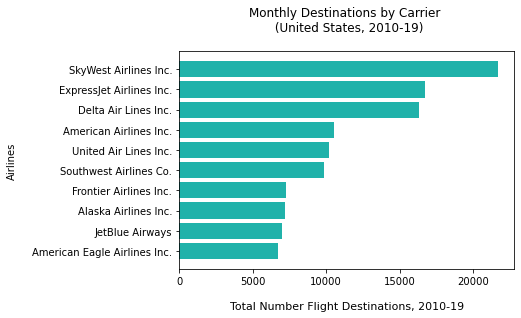

In [58]:
plt.figure(facecolor='white')
plt.barh(most_arr_top10['Airline_Carrier'], most_arr_top10['num_monthly_dest_served'],color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Monthly Destinations by Carrier \n (United States, 2010-19)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Total Number Flight Destinations, 2010-19', fontsize=11, color='black', rotation=0, labelpad=15)
#plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
#plt.legend(loc = 'upper right')
plt.savefig('Top10_al_most_dest', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

### Relative proportion of Destination Airports served by each airline on a monthly basis from 2010-2019

In [59]:
text = " ".join(review for review in delays.carrier_del.astype(str))
print ("There are {} words in the combination of all cells in column carrier_del.".format(len(text)))

There are 3356688 words in the combination of all cells in column carrier_del.


In [60]:
stopwords = set(STOPWORDS)

NameError: name 'STOPWORDS' is not defined

In [61]:
stopwords.update(["Airline", "Airlines", "Airways", "Aviation", "Air", "Lines", "Inc", "International", "LLC", "PSA"])

NameError: name 'stopwords' is not defined

In [62]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

NameError: name 'WordCloud' is not defined

NameError: name 'wordcloud' is not defined

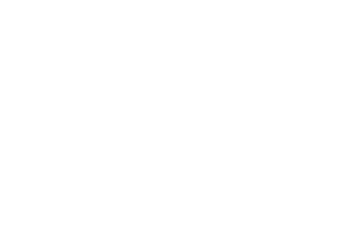

<Figure size 2880x1440 with 0 Axes>

In [63]:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [64]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [65]:
#find sum of all delays for each airport for entire dataset
ap15_all_years = delays.groupby(['airport_code_del'])['arr_del15'].sum().rename_axis('ap_iata').reset_index(name='all_delays').sort_values(by='all_delays', ascending=False)
ap15_all_years.head(30)

,ap_iata,all_delays
264,ORD,622421.0
21,ATL,609302.0
97,DFW,459139.0
201,LAX,431393.0
328,SFO,424768.0
96,DEN,407534.0
121,EWR,318372.0
173,IAH,296267.0
210,LGA,272552.0
281,PHX,269958.0


In [66]:
airports.columns

Index(['Airport ID', 'Name_ap', 'City', 'Country_ap', 'IATA_ap', 'ICAO_ap',
       'Lat_ap', 'Long_ap', 'Alt_ap', 'TZone_ap'],
      dtype='object')

In [67]:
ap15_all_years.columns

Index(['ap_iata', 'all_delays'], dtype='object')

In [68]:
ap15_all_years = ap15_all_years.merge(airports, left_on='ap_iata', right_on='IATA_ap', how='left')
ap15_all_years.head(1)

,ap_iata,all_delays,Airport ID,Name_ap,City,Country_ap,IATA_ap,ICAO_ap,Lat_ap,Long_ap,Alt_ap,TZone_ap
0,ORD,622421.0,3830.0,Chicago O'Hare International Airport,Chicago,United States,ORD,KORD,41.9786,-87.9048,672.0,-6


In [69]:
ap15_all_years.columns

Index(['ap_iata', 'all_delays', 'Airport ID', 'Name_ap', 'City', 'Country_ap',
       'IATA_ap', 'ICAO_ap', 'Lat_ap', 'Long_ap', 'Alt_ap', 'TZone_ap'],
      dtype='object')

In [70]:
ap15_all_years.drop(['Country_ap', 'ICAO_ap', 'Alt_ap', 'TZone_ap'], axis=1, inplace=True)
ap15_all_years.head(1)

,ap_iata,all_delays,Airport ID,Name_ap,City,IATA_ap,Lat_ap,Long_ap
0,ORD,622421.0,3830.0,Chicago O'Hare International Airport,Chicago,ORD,41.9786,-87.9048


In [71]:
ap15_all_years['all_delays'].max()

622421.0

In [72]:
ap15_all_years['all_delays'].min()

0.0

In [73]:
ap15_all_years['all_delays'].mean()

30152.815584415584

In [74]:
ap15_all_years.isna().sum()

ap_iata        0
all_delays     0
Airport ID    12
Name_ap       12
City          12
IATA_ap       12
Lat_ap        12
Long_ap       12
dtype: int64

In [75]:
#drop all na values
ap15_all_years.dropna(subset=['Lat_ap', 'Long_ap'], inplace=True)
ap15_all_years.isna().sum()


ap_iata       0
all_delays    0
Airport ID    0
Name_ap       0
City          0
IATA_ap       0
Lat_ap        0
Long_ap       0
dtype: int64

In [76]:
#sorted all_delays into descending order
ap15_all_years.head(10)

,ap_iata,all_delays,Airport ID,Name_ap,City,IATA_ap,Lat_ap,Long_ap
0,ORD,622421.0,3830.0,Chicago O'Hare International Airport,Chicago,ORD,41.978600,-87.904800
1,ATL,609302.0,3682.0,Hartsfield Jackson Atlanta International Airport,Atlanta,ATL,33.636700,-84.428101
2,DFW,459139.0,3670.0,Dallas Fort Worth International Airport,Dallas-Fort Worth,DFW,32.896801,-97.038002
3,LAX,431393.0,3484.0,Los Angeles International Airport,Los Angeles,LAX,33.942501,-118.407997
4,SFO,424768.0,3469.0,San Francisco International Airport,San Francisco,SFO,37.618999,-122.375000
5,DEN,407534.0,3751.0,Denver International Airport,Denver,DEN,39.861698,-104.672997
6,EWR,318372.0,3494.0,Newark Liberty International Airport,Newark,EWR,40.692501,-74.168701
7,IAH,296267.0,3550.0,George Bush Intercontinental Houston Airport,Houston,IAH,29.984400,-95.341400
8,LGA,272552.0,3697.0,La Guardia Airport,New York,LGA,40.777199,-73.872597
9,PHX,269958.0,3462.0,Phoenix Sky Harbor International Airport,Phoenix,PHX,33.434299,-112.012001


In [77]:
#create groups or stages from 0 (min) to 622421 delays
stages = ["600000+", "450001-600000", "350001-450000", "250001-350000", "150001-250000", "100001-150000",
         "100001-150000", "50001-100000", "0-50000"]

In [92]:
# Create tuples of row indexes for the above ranges
tuple1 = (0, ap15_all_years[ap15_all_years.all_delays > 600000].index[-1]+1)
tuple2 = (tuple1[1], ap15_all_years[(ap15_all_years.all_delays > 450001) & (ap15_all_years.all_delays <=600000)].index[-1]+1)
tuple3 = (tuple2[1], ap15_all_years[(ap15_all_years.all_delays > 350001) & (ap15_all_years.all_delays <=450000)].index[-1]+1)
tuple4 = (tuple3[1], ap15_all_years[(ap15_all_years.all_delays > 250001) & (ap15_all_years.all_delays <=350000)].index[-1]+1)
tuple5 = (tuple4[1], ap15_all_years[(ap15_all_years.all_delays > 150001) & (ap15_all_years.all_delays <=250000)].index[-1]+1)
tuple6 = (tuple5[1], ap15_all_years[(ap15_all_years.all_delays > 100001) & (ap15_all_years.all_delays <=150000)].index[-1]+1)
tuple7 = (tuple6[1], ap15_all_years[(ap15_all_years.all_delays > 51001)  & (ap15_all_years.all_delays <=100000)].index[-1]+1)
tuple8 = (tuple7[1], ap15_all_years[(ap15_all_years.all_delays > 25001)  & (ap15_all_years.all_delays <=50000)].index[-1]+1)
tuple9 = (tuple8[1], ap15_all_years[(ap15_all_years.all_delays > 0)      & (ap15_all_years.all_delays <=25000)].index[-1]+1)

limits = [tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, tuple7, tuple8, tuple9]
limits

[(0, 2),
 (2, 3),
 (3, 6),
 (6, 12),
 (12, 24),
 (24, 32),
 (32, 52),
 (52, 77),
 (77, 379)]

In [167]:
colors = ["#318CE7","#00CED1","#87CEEB","#C4C3D0","#97FFFF", "#E7FEFF", "#CCCCFF", "#F8F8FF", "#8DEEEE"]


In [168]:
fig = go.Figure()
stage_counter = 0
for i in range(len(limits)):
    lim = limits[i]
    df_sub = ap15_all_years[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Long_ap'],
        lat = df_sub['Lat_ap'],
        text = df_sub['Name_ap'],
        marker = dict(
            size = df_sub['all_delays']*0.002,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{}'.format(stages[stage_counter])))
    stage_counter = stage_counter+1


In [169]:
fig.update_layout(
        title_text = 'Airports with Most Delays, 2010-19',
        title_x=0.5,
        showlegend = True,
        legend_title = 'Number of Delays, 2010-19',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            projection=go.layout.geo.Projection(type = 'albers usa'),
        )
    )


### --------------------------------------------------------------------------------------------------- end delays

### Airplanes

In [ ]:
airplanes = pd.read_csv('../Data/airplanes.csv')
airplanes.head()

In [ ]:
airplanes.rename(columns = {'Name':'Plane', 'IATA code':'Plane_IATA','ICAO code':'Plane_ICAO'}, inplace=True)
airplanes.head()

In [ ]:
airplanes.isnull().sum()

### -------------------------------------------------------------------------------- end airplanes

### Routes (not helpful b/c of lack of records - use passengers data instead)

In [ ]:
routes = pd.read_csv('../Data/routes.csv')
routes.head()

In [ ]:
routes.shape

In [ ]:
routes.isnull().sum()

In [ ]:
routes.drop('Codeshare', axis=1, inplace=True)
routes.head(1)

In [ ]:
routes.rename(columns = {'Airline':'Airline_IATA_r', 'Airline ID':'Airline_ID_r', 'Source airport': 'Source_ap_r', 'Source airport ID': 'Source_ap_ID_r', 'Destination airport': 'Dest_ap_r', 'Destination airport ID': 'Dest_ap_ID_r', 'Stops':'Stops_r','Equipment':'Plane_IATA_r'}, inplace=True)
routes.head(1)

### ------------------------------------------------------------------------------------------------------------------- end routes

In [ ]:
### Finding Number of Carrier Delays by more than 15 minutes
### Join Airlines with Delays

In [ ]:
delays.head(2)

In [ ]:
delays.carrier_del.unique()

In [ ]:
delays.columns

In [ ]:
airlines.Name_al.unique()

In [ ]:
airlines.head()

In [ ]:
delays.isnull().sum()

In [ ]:
delays.columns

In [ ]:
airlines.columns

### Merge Airline dataset with Delay dataset

In [ ]:
#mergedStuff = pd.merge(df1, df2, on=['Name'], how='inner')
delays_al = delays.merge(airlines, left_on='al_iata_del', right_on='IATA_al', how='left')
delays_al.head(2)

In [ ]:
delays_al.columns

In [ ]:
delays_al = delays_al.loc[:, ['year_del', 'month_del', 'al_iata_del', 'carrier_del', 'airport_code_del', 'airport_name_del', 'AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al', 'Country_al', 'Active_al', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled','arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay','nas_delay', 'security_delay', 'late_aircraft_delay']]
delays_al.head(3)

In [ ]:
#can also use iterrows
#for x in airlines.itertuples():
#    if x[2].find('ExpressJet') != -1:
#        print(x)

In [ ]:
#thinking about joining on airline name after filter but expressjet appears to be the only one with a history of changes in delays data
#express = airlines[airlines['Name'].str.contains('ExpressJet')]
#express.head()

In [ ]:
delays_al.columns

In [ ]:
delays_al_sum = delays_al.groupby(['carrier_del'])['arr_del15'].sum().sort_values(ascending=False).reset_index(name='sum_delays')
delays_al_sum.head(2)

In [ ]:
sum_arr_air = delays_al.groupby(['carrier_del'])['arr_flights'].sum().sort_values(ascending=False).reset_index(name='sum_arrivals')
sum_arr_air.head(2)

In [ ]:
delays_all_airlines = delays_al_sum.merge(sum_arr_air, left_on='carrier_del', right_on='carrier_del', how='left')
delays_all_airlines.head()

### -----------------------------------------------------------------------------

### Top/Bottom AIRLINE Delay Percentage from 2010-2019

In [ ]:
delays_all_airlines['pct_delay'] = delays_all_airlines['sum_delays'] / delays_all_airlines['sum_arrivals']
delays_all_airlines = delays_all_airlines.sort_values(by='pct_delay', ascending=False)
delays_all_airlines.head(10)

In [ ]:
delays_all_al_top10 = delays_all_airlines.nlargest(n=10, columns=['pct_delay'])
delays_all_al_top10.head(11)

In [ ]:
delays_al.year_del.min()

In [ ]:
delays_al.year_del.max()

# -----------------------------------------------------------

### Average & Mean Delays for All AIRLINES

In [ ]:
#average
delays_all_airlines.sum_delays.sum() / delays_all_airlines.sum_arrivals.sum()

In [ ]:
#mean
delays_all_airlines.pct_delay.mean()

In [ ]:
plt.figure(facecolor='white')
plt.barh(delays_all_al_top10['carrier_del'], delays_all_al_top10['pct_delay'],color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Top Airline Flight Delay Percentages \n (United States)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Percentage of Total Flights Delayed', fontsize=11, color='black', rotation=0, labelpad=15)
#plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
#plt.legend(loc = 'upper right')
plt.savefig('Top10_Delayed_Airlines', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

### --------------------------------------------------------------------------------

In [ ]:
#finding month of most airline delays of 15 minutes or more
delays_month = delays_al.groupby(['year_del', 'month_del', 'carrier_del','arr_flights', 'arr_del15'])['arr_del15'].sum().sort_values(ascending=False).reset_index(name='sum_delays')
delays_month.head(10)

### Merge Passengers with Routes --- Passengers have year & month data

In [ ]:
routes.columns

In [ ]:
routes.dtypes

In [ ]:
passengers.columns

In [ ]:
passengers.dtypes

In [ ]:
# Joining routes doesn't help mainly because of lack of records, Airline ID is known (airline IATA would be nice),
routes.tail(1)

In [ ]:
passengers.tail(1)

In [ ]:
pass_routes = passengers.merge(routes, left_on=['AIRLINE_ID', 'ORIGIN', 'DEST'], right_on=['Airline_ID_r', 'Source_ap_r', 'Dest_ap_r'],  how='left')
pass_routes.head(2)

In [ ]:
passengers.shape

In [ ]:
routes.shape

In [ ]:
pass_routes.shape